 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [221]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path
import matplotlib.pyplot as plt

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [24]:
# Reading whale returns
whale_csvpath = Path("../Starter_Code/Resources/whale_returns.csv")
whale_df = pd.read_csv(whale_csvpath)
whale_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
0,2015-03-02,NaN,NaN,NaN,NaN
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [25]:
# Count nulls
whale_df.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [26]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
1,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2,2015-03-04,0.002230,0.003241,-0.002534,0.004213
3,2015-03-05,0.004016,0.004076,0.002355,0.006726
4,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
5,2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...,...
1055,2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
1056,2019-04-26,0.008149,0.009162,0.012355,0.010434
1057,2019-04-29,0.001254,0.002719,0.006251,0.005223
1058,2019-04-30,-0.001295,-0.002211,-0.000259,-0.003702


In [57]:
#Set date to index 
whale_df.set_index(pd.to_datetime(whale_df['Date'], infer_datetime_format=True), inplace=True)
whale_df.drop(columns=['Date'], inplace=True)
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [58]:
# Set the `date` as a datetime index
#whale_df = pd.read_csv(whale_csvpath, index_col="Date", parse_dates=True, infer_datetime_format=True)
#whale_df.head()
whale_df.index = pd.to_datetime(whale_df.index)


## Algo Daily Returns

Read the algorithmic daily returns and clean the data

In [27]:
# Reading algorithmic returns
algo_csvpath = Path("../Starter_Code/Resources/algo_returns.csv")
algo_df = pd.read_csv(algo_csvpath)
algo_df.head()


,Date,Algo 1,Algo 2
0,2014-05-28,0.001745,NaN
1,2014-05-29,0.003978,NaN
2,2014-05-30,0.004464,NaN
3,2014-06-02,0.005692,NaN
4,2014-06-03,0.005292,NaN


In [8]:
# Set date to index
algo_df.set_index(pd.to_datetime(algo_df['Date'], infer_datetime_format=True), inplace=True)
#Drop the Extra Date Column 
algo_df.drop(columns=['Date'], inplace=True)
algo_df.head()
# Count nulls
algo_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [28]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df

,Date,Algo 1,Algo 2
6,2014-06-05,0.004062,0.013285
7,2014-06-06,0.001857,0.008284
8,2014-06-09,-0.005012,0.005668
9,2014-06-10,0.004406,-0.000735
10,2014-06-11,0.004760,-0.003761
...,...,...,...
1236,2019-04-25,0.000682,-0.007247
1237,2019-04-26,0.002981,0.005256
1238,2019-04-29,0.005208,0.002829
1239,2019-04-30,-0.002944,-0.001570


In [45]:
# Set the `date` as a datetime index
#algo_df = pd.read_csv(algo_csvpath, index_col="Date", parse_dates=True, infer_datetime_format=True)
#algo_df.dropna(inplace=True)


algo_df.index = pd.to_datetime(algo_df.index)


In [11]:
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [89]:
# Reading S&P 500 Closing Prices
sp500_csvpath = Path("../Starter_Code/Resources/sp500_history.csv")
sp500_df = pd.read_csv(sp500_csvpath)
sp500_df.head()


,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06


In [90]:
# Set date to index
sp500_df.set_index(pd.to_datetime(sp500_df['Date'], infer_datetime_format=True), inplace=True)
#Drop the Extra Date Column 
sp500_df.drop(columns=['Date'], inplace=True)
sp500_df.head()


,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [177]:
# Check Data Types
#sp500_df.dtypes
#sp500_df.head()

Close    object
dtype: object

In [91]:
sp500_df['Close'] = sp500_df['Close'].str.replace('$', '')
sp500_df['Close'] = sp500_df['Close'].astype('float64')

# Set date to index
#sp500_df = pd.read_csv(sp500_csvpath, index_col="Date", parse_dates=True, infer_datetime_format=True)
#sp500_df.dropna(inplace=True)



<ipython-input-91-080787529920>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp500_df['Close'] = sp500_df['Close'].str.replace('$', '')


In [99]:
# Calculate Daily Returns
daily_returns = sp500_df.pct_change(1)
sp500_DR = daily_returns
sp500_DR.head()

,SP500_Returns
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [100]:
# Drop nulls
sp500_DR.dropna(inplace=True)
sp500_DR.head()

,SP500_Returns
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [98]:
# Rename `Close` Column to be specific to this portfolio.
sp500_df.columns = (['SP500_Returns'])
sp500_df.head(10)


sp500_df.index = pd.to_datetime(sp500_df.index)

## Combine Whale, Algorithmic, and S&P 500 Returns

In [173]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_df, algo_df, sp500_DR], axis='columns', join='inner')
combined_df.tail()



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500_Returns
Date,,,,,,,
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.008764


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

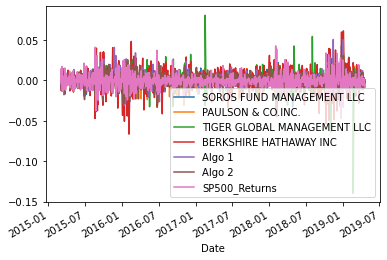

In [119]:
# Plot daily returns of all portfolios

combined_df.plot()

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

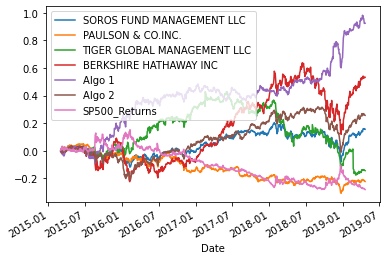

In [104]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod() - 1
cumulative_returns.head()

# Plot cumulative returns
cumulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


# Box plot to visually show risk


### Calculate Standard Deviations

<AxesSubplot:>

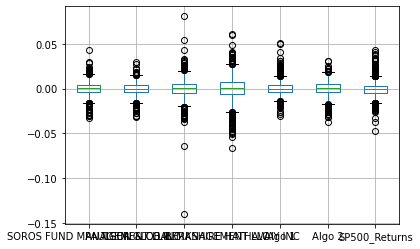

In [121]:
# Box plot to visually show risk
combined_df.boxplot()


In [141]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_df.std()
daily_std.head()

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [128]:
# Calculate  the daily standard deviation of S&P 500
sp500_DR.std()

### Determine which portfolios are riskier than the S&P 500
'Berkshire Hathaway, Inc. at 0.012919 is riskier than S&P 500 at 0.008135

SP500_Returns    0.008135
dtype: float64

### Calculate the Annualized Standard Deviation

In [142]:
#### Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std * np.sqrt(252)
annualized_std.head()

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [134]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_df.rolling(window=21).mean()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500_Returns
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2019-04-15,0.001640,0.000122,0.001499,0.002082,0.001359,0.001112,-0.001209
2019-04-16,0.001450,0.000153,0.001473,0.001979,0.000864,0.000614,-0.001107
2019-04-17,0.001305,-0.000252,0.000996,0.001581,0.000475,0.000389,-0.001322


<AxesSubplot:xlabel='Date'>

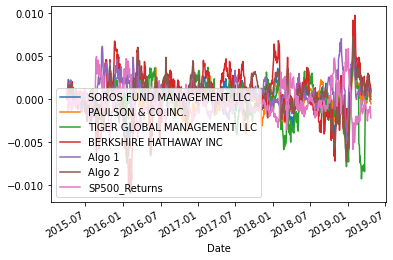

In [135]:
# Plot the rolling standard deviation
combined_df.rolling(window=21).mean().plot()

### Calculate and plot the correlation

In [143]:
# Calculate the correlation
correlation = combined_df.corr()
correlation



,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500_Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
SP500_Returns,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


<AxesSubplot:>

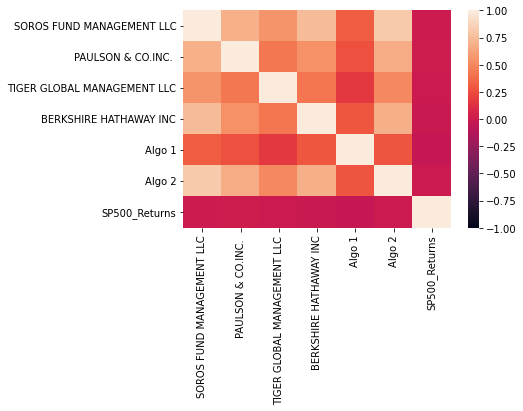

In [146]:
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

'Based on this analysis, Alog 1 mimiks the S&P500 the closest.'

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [164]:
# Calculate covariance of a single portfolio
covariance = combined_df['Algo 1'].cov(combined_df['SP500_Returns'])
covariance

-2.223042551715512e-06

In [165]:
# Calculate variance of S&P 500
variance = combined_df['SP500_Returns'].var()
variance

7.373467552840441e-05

In [169]:
# Computing beta
SP500_beta = covariance / variance
SP500_beta

-0.030149214542337564

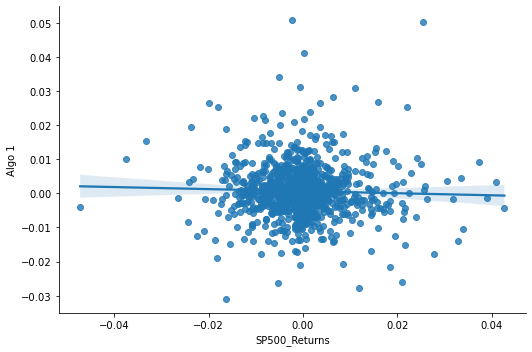

In [176]:
# Plot beta v correlation trend
sns.lmplot(x='SP500_Returns', y='Algo 1', data=combined_df, aspect=1.5, fit_reg=True)

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [179]:
# Use `ewm` to calculate the rolling window
combined_df['21DayEWM'] = combined_df['Algo 1'].ewm(span=21, adjust=False).mean()

In [180]:
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP500_Returns,21DayEWM
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.001942,-0.001942
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.002546,-0.002546
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,-0.002402,-0.002402
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.002634,-0.002634
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.002890,-0.002890


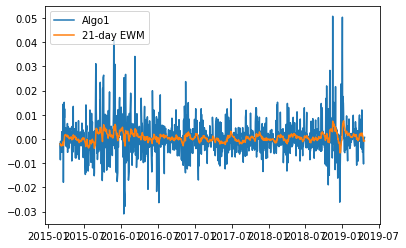

In [187]:
#plot Algo and 21-day exponentially weighted moving average 
plt.plot(combined_df['Algo 1'], label='Algo1')
plt.plot(combined_df['21DayEWM'], label='21-day EWM')

#add legend to plot
plt.legend(loc=2)

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [196]:
# Annualized Sharpe Ratios
sharpe_ratios = ((combined_df.mean()) * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
SP500_Returns                  6.033210
21DayEWM                       6.033210
dtype: float64

In [220]:
# Box plot to visually show risk
sharpe_ratios.boxplot()


AttributeError: 'Series' object has no attribute 'boxplot'

<AxesSubplot:title={'center':'Sharpe Ratios'}>

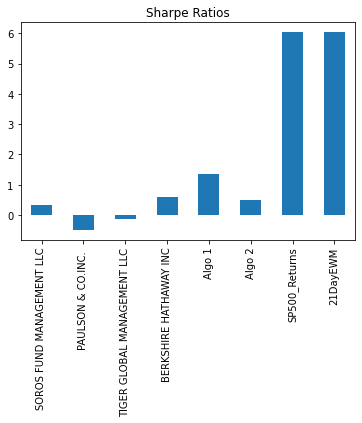

In [212]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [223]:
# Reading data from 1st stock
goog_csvpath = Path("../Starter_Code/Resources/GOOG_returns.csv")
goog_df = pd.read_csv(goog_csvpath)
goog_df.head()

,Date,Close
0,9/28/2020 16:00:00,1464.52
1,9/29/2020 16:00:00,1469.33
2,9/30/2020 16:00:00,1469.60
3,10/1/2020 16:00:00,1490.09
4,10/2/2020 16:00:00,1458.42


In [230]:
# Set date to index
goog_df.set_index(pd.to_datetime(goog_df['Date'], infer_datetime_format=True), inplace=True)
#Drop the Extra Date Column 
goog_df.drop(columns=['Date'], inplace=True)
goog_df.head()

,Close
Date,
2020-09-28 16:00:00,1464.52
2020-09-29 16:00:00,1469.33
2020-09-30 16:00:00,1469.60
2020-10-01 16:00:00,1490.09
2020-10-02 16:00:00,1458.42


In [234]:
goog_df.columns = (['GOOG'])
goog_df.head()

,GOOG
Date,
2020-09-28 16:00:00,1464.52
2020-09-29 16:00:00,1469.33
2020-09-30 16:00:00,1469.60
2020-10-01 16:00:00,1490.09
2020-10-02 16:00:00,1458.42


In [225]:
# Reading data from 2nd stock
aapl_csvpath = Path("../Starter_Code/Resources/APPL_returns.csv")
aapl_df = pd.read_csv(aapl_csvpath)
aapl_df.head()

,Date,Close
0,9/28/2020 16:00:00,114.96
1,9/29/2020 16:00:00,114.09
2,9/30/2020 16:00:00,115.81
3,10/1/2020 16:00:00,116.79
4,10/2/2020 16:00:00,113.02


In [231]:
# Set date to index
aapl_df.set_index(pd.to_datetime(aapl_df['Date'], infer_datetime_format=True), inplace=True)
#Drop the Extra Date Column 
aapl_df.drop(columns=['Date'], inplace=True)
aapl_df.head()

,Close
Date,
2020-09-28 16:00:00,114.96
2020-09-29 16:00:00,114.09
2020-09-30 16:00:00,115.81
2020-10-01 16:00:00,116.79
2020-10-02 16:00:00,113.02


In [236]:
aapl_df.columns = (['AAPL'])
aapl_df.head()

,AAPL
Date,
2020-09-28 16:00:00,114.96
2020-09-29 16:00:00,114.09
2020-09-30 16:00:00,115.81
2020-10-01 16:00:00,116.79
2020-10-02 16:00:00,113.02


In [228]:
# Reading data from 3rd stock
cost_csvpath = Path("../Starter_Code/Resources/COST_returns.csv")
cost_df = pd.read_csv(cost_csvpath)
cost_df.head()

,Date,Close
0,9/28/2020 16:00:00,349.62
1,9/29/2020 16:00:00,352.14
2,9/30/2020 16:00:00,355.00
3,10/1/2020 16:00:00,358.46
4,10/2/2020 16:00:00,355.01


In [232]:
# Set date to index
cost_df.set_index(pd.to_datetime(cost_df['Date'], infer_datetime_format=True), inplace=True)
#Drop the Extra Date Column 
cost_df.drop(columns=['Date'], inplace=True)
cost_df.head()

,Close
Date,
2020-09-28 16:00:00,349.62
2020-09-29 16:00:00,352.14
2020-09-30 16:00:00,355.00
2020-10-01 16:00:00,358.46
2020-10-02 16:00:00,355.01


In [237]:
cost_df.columns = (['COST'])
cost_df.head()

,COST
Date,
2020-09-28 16:00:00,349.62
2020-09-29 16:00:00,352.14
2020-09-30 16:00:00,355.00
2020-10-01 16:00:00,358.46
2020-10-02 16:00:00,355.01


In [265]:
# Combine all stocks in a single DataFrame
combined_df = pd.concat([goog_df, aapl_df, cost_df], axis='columns', join='inner')
combined_df.tail()


,GOOG,AAPL,COST
Date,,,
2021-09-20 16:00:00,2780.34,142.94,451.14
2021-09-21 16:00:00,2792.93,143.43,452.11
2021-09-22 16:00:00,2818.77,145.85,452.33
2021-09-23 16:00:00,2836.53,146.83,452.78
2021-09-24 16:00:00,2852.66,146.92,467.75


In [266]:
# Calculate daily returns
daily_returns = combined_df.pct_change(1)
daily_returns.head()
# Drop NAs
daily_returns.dropna(inplace=True)

# Display sample data
daily_returns.head()

,GOOG,AAPL,COST
Date,,,
2020-09-29 16:00:00,0.003284,-0.007568,0.007208
2020-09-30 16:00:00,0.000184,0.015076,0.008122
2020-10-01 16:00:00,0.013943,0.008462,0.009746
2020-10-02 16:00:00,-0.021254,-0.032280,-0.009625
2020-10-05 16:00:00,0.018925,0.030791,0.010056


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [243]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_returns.dot(weights)
PORT_RET = portfolio_returns
# Display sample data
PORT_RET.head()

Date
2020-09-29 16:00:00    0.000975
2020-09-30 16:00:00    0.007794
2020-10-01 16:00:00    0.010717
2020-10-02 16:00:00   -0.021053
2020-10-05 16:00:00    0.019924
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

this instruction is not clear to me. Are we supposed to join the porfolio returns with our orignal portfolio or with the portfolio returns from the Whales project? I asked my prfessor via slack and have not received a response. 

In [272]:
# Join your returns DataFrame to the original returns DataFrame


In [253]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
daily_returns.dropna(inplace=True)

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [ ]:
# Calculate the annualized `std`
daily_std = daily_returns.std()\n",
    "daily_std.head()"


### Calculate and plot rolling `std` with 21-day window

In [ ]:
# Calculate rolling standard deviation

# Plot rolling standard deviation


### Calculate and plot the correlation

In [ ]:
# Calculate and plot the correlation


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [ ]:
# Calculate and plot Beta


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [ ]:
# Calculate Annualzied Sharpe Ratios


In [ ]:
# Visualize the sharpe ratios as a bar plot


### How does your portfolio do?

Write your answer here!